In [30]:
# importing libraries

from sklearnex import patch_sklearn 
patch_sklearn()

import pandas as pd
import seaborn as sns
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,roc_curve,plot_roc_curve

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# printing all the columns and rows
pd.set_option("display.max_columns",None)
pd.set_option("display.min_rows",None)

In [3]:
#reading the data file
data=pd.read_csv(r"C:\Users\nitee\OneDrive\Desktop\niteen\Customer Churn Prediction\Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Information

* Customer ID : ID of the customer
* gender : Male or Female
* SeniorCitizen : 1 for Senior Citizen & 0 for Non-Senior Citizen
* Partner : customer has partner or not (Y/N)
* Dependents :customer has dependents or not (Y/N)
* tenure : No of motnhs the customer has stayed with company
* PhoneService : customer has Phone Service or not (Y/N)
* MultipleLines : customer has Multiple Lines or not (Y/N)
* InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* Churn : Customers who left within the last month
* rest are Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

In [4]:
# lets check the rows and columns of the dataset
data.shape

(7043, 21)

the dataset has 7043 records with 21 columns

In [5]:
# lets check the datatypes of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


all the columns are object type except for 'SeniorCitizen','tenure' & 'MonthlyCharges'

'TotalCharges' is numerical data type but it is characterized as object type

In [6]:
# changing the data type of 'ToalCharges' to numeric
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [7]:
# lets check for null values in the dataset
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

there are 11 NULL values in onle one column and since it's only 0.15% of the data so we can drop it

In [8]:
# dropping those records with NULL values
data=data[data.TotalCharges.isnull()==False]
data.shape

(7032, 21)

In [9]:
# lets check the count of target variable
data.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

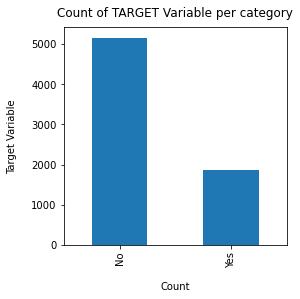

In [10]:
data['Churn'].value_counts().plot(kind='bar', figsize=(4, 4))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

clearly the dataset is imbalanced as the number of customers who are chruning is comparatively lower. we shall deal with it at the later stage

In [11]:
# lets check the statistical distribution of numerical columns
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


* 'SeniorCitizen' is categorical column so its distribution is not proper
* 50% of the customers have churned after 29 months only
* 75% of the customers recharge with less than USD 89 on monthly basis where average monthly recharge is USD 65

In [12]:
# lets check the statistical distribution of categorical columns
data.describe(include=[object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,1029-QFBEN,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [13]:
data.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

as we can see there are many distinct values for tenure columns and they are in months. so we can segment them on yearly basis using binning method

In [14]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)
data.tenure_group.value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_group, dtype: int64

since we have binned the tenure column, we don;t need it anymore also customerID is irrelevant in analysis so we can drop it too

In [15]:
# dropping columns
data.drop(['tenure','customerID'],axis=1,inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# EDA

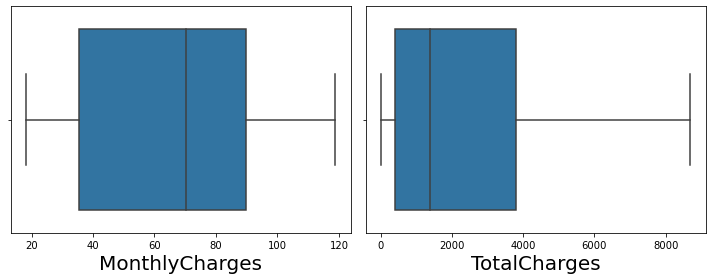

In [16]:
# lets check for the outliers 

plt.figure(figsize=(10,4))
plotnumber=1

for column in data[['MonthlyCharges','TotalCharges']]:
    if plotnumber<=2:     # as there are 2 columns in the x
        ax=plt.subplot(1,2,plotnumber) 
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
    
plt.tight_layout()    

### Univariate Analysis

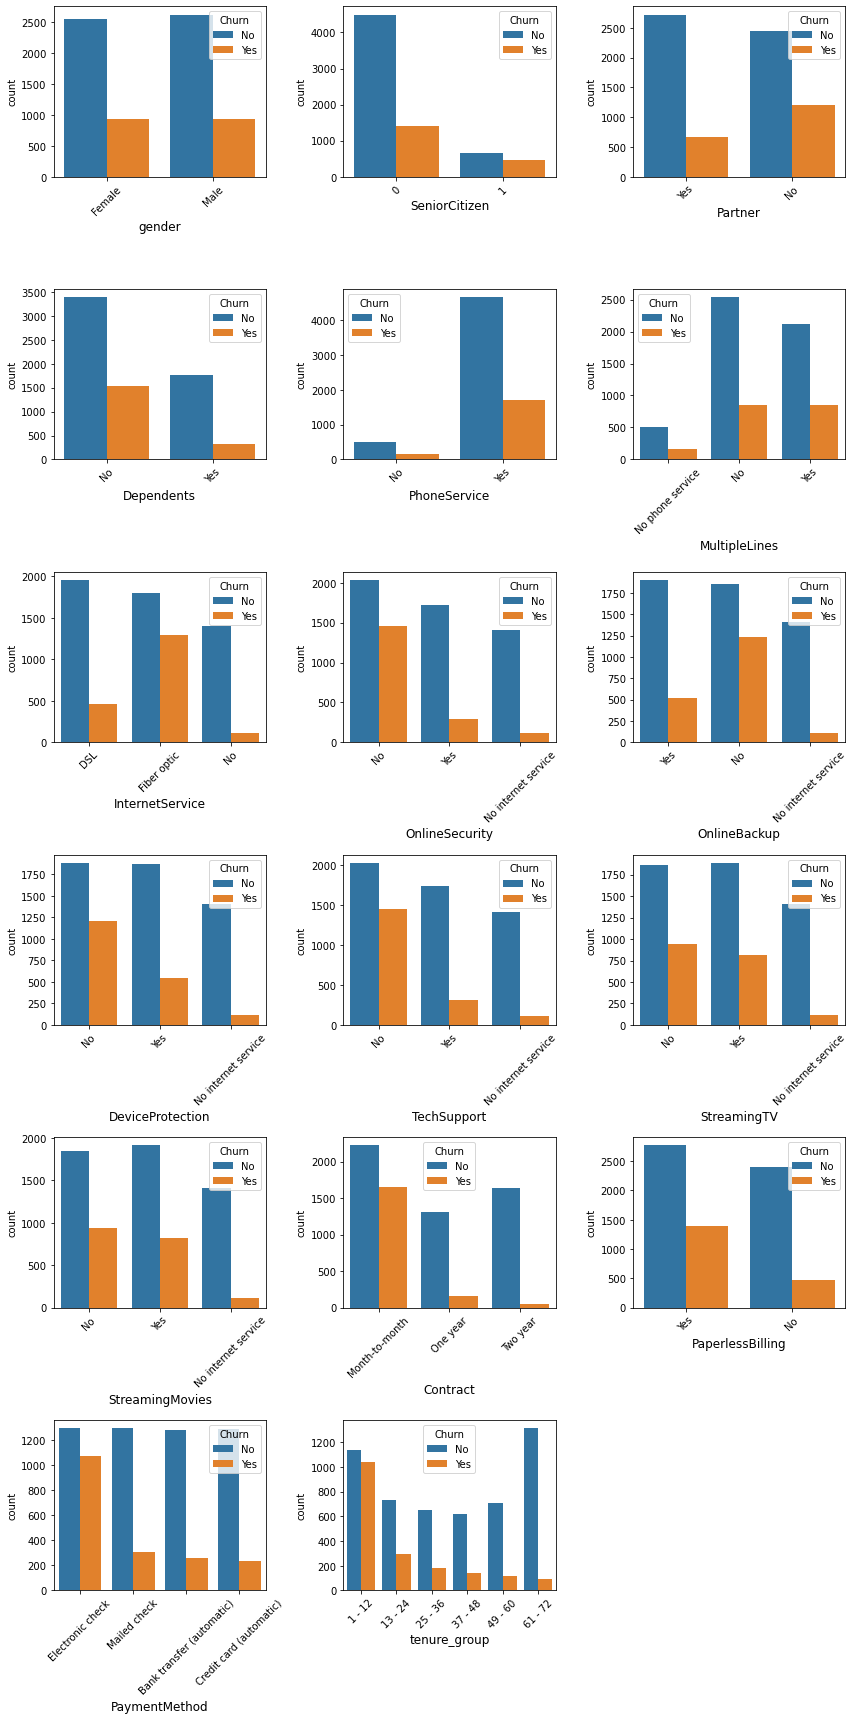

In [17]:
plt.figure(figsize=(12,24))
plotnumber=1

for i, predictor in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    if plotnumber<=17:  # as there are 17 columns
        ax=plt.subplot(6,3,plotnumber) 
        #plt.figure(i)
        sns.countplot(data=data, x=predictor, hue='Churn')
        plt.xlabel(predictor, fontsize=12)
        plt.xticks(rotation = 45)
    plotnumber+=1

plt.tight_layout()

##### Observations
* gender-wise the customer churn is almost same for both the genders
* number of senior citizen is very low but the number of customer churn is almost same as non churn customers
* people who don't have partner are more likely to churn
* people who don't have dependents are more likely to churn
* there are very large number of people using phone services and there likes of churning is also more
* people who uses Fibre optic Internet services are most likely to churn 
* people who don't use Online Security are more likely to churn
* people who don't have Online backup are more likely to churn
* people who don't use any services are more likely to churn
* people with month-to-month contract are more likey to churn
* people who uses electronic check for payments are more likely to churn
* among the churning customers, most of them churned within 12 months of time

Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [18]:
data['Churn'] = np.where(data.Churn == 'Yes',1,0)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


now lets convert all categorical features into dummy variables

In [19]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


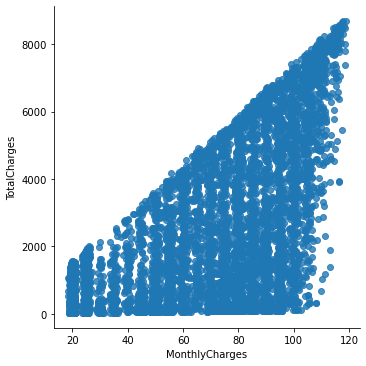

In [20]:
# Relationship between Monthly Charges and Total Charges
sns.lmplot(data=data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [21]:
data_dummies[['MonthlyCharges','TotalCharges']].corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.651065
TotalCharges,0.651065,1.000000


Total charges increase as when we increase monthly charges

Text(0.5, 1.0, 'Monthly charges by churn')

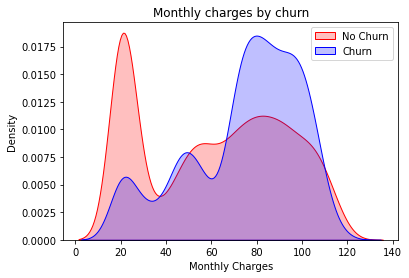

In [22]:
# Churn by Monthly Charges
Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

As we can see Churn is high when Monthly Charges ar high and churn is low when monthly charges are low

Text(0.5, 1.0, 'Total charges by churn')

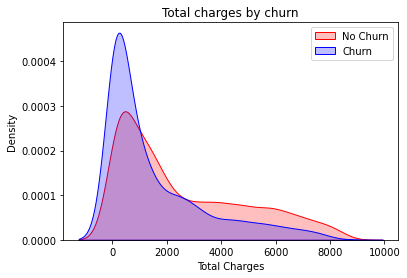

In [23]:
# Churn by Total Charges
Tot = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

Surprisingly when the Total charges are low, Churn is very high

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

<AxesSubplot:>

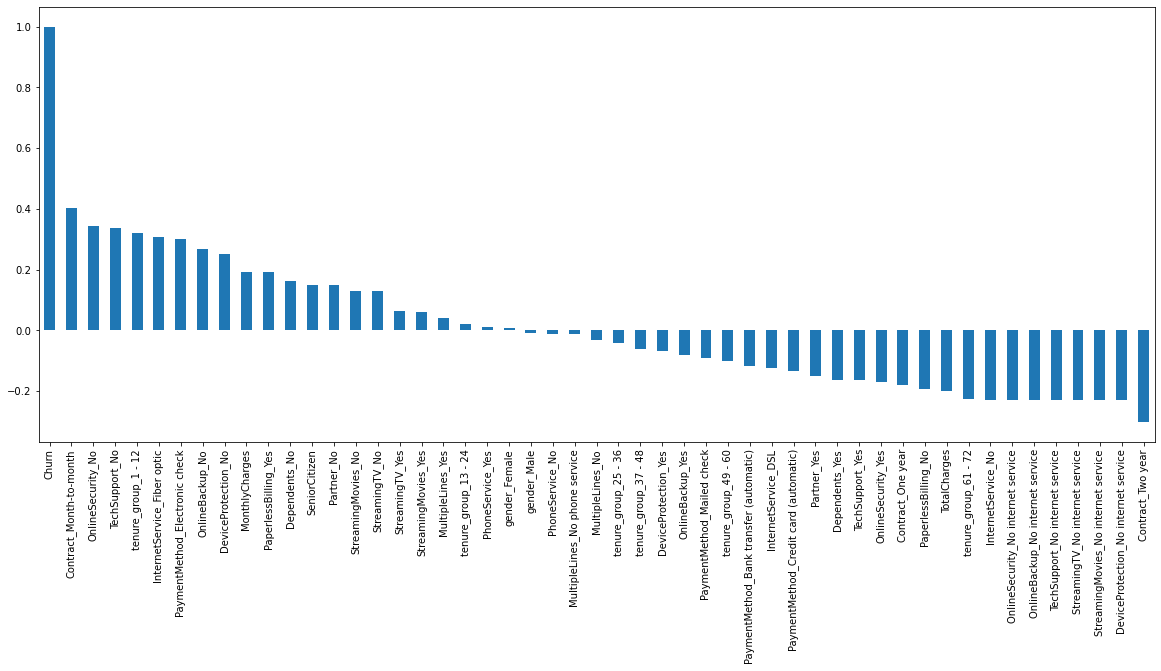

In [24]:
# Building a corelation of all predictors with 'Churn'
plt.figure(figsize=(20,8))
data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

#### Observation

* HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

* LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

* Factors like Gender, Availability of PhoneService and multiple lines have alomost NO impact on Churn

<AxesSubplot:>

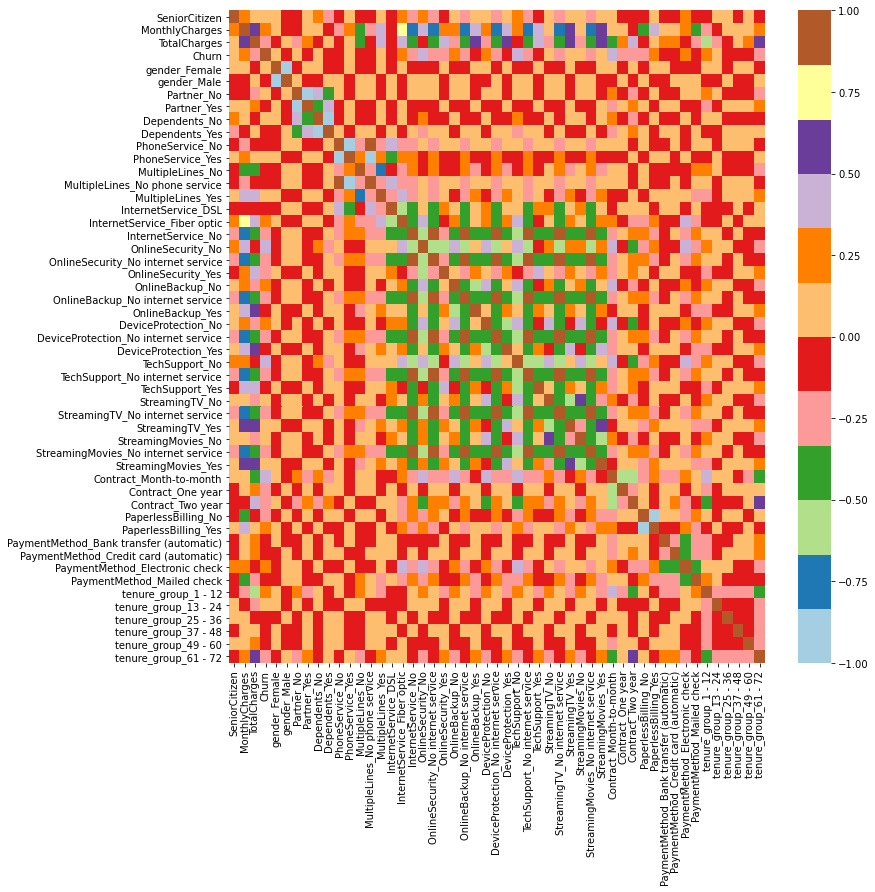

In [25]:
# lets visualize the above observation using Heat map too
plt.figure(figsize=(12,12))
sns.heatmap(data_dummies.corr(), cmap="Paired")

### Bivariate Analysis

In [26]:
# segregating the data on the basis of target variable
df_target0=data.loc[data["Churn"]==0]
df_target1=data.loc[data["Churn"]==1]

In [34]:
def uniplot(df,col,title,hue =None):
    plt.figure(figsize=(8,6))
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['axes.titlepad'] = 20
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)

    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

<Figure size 576x432 with 0 Axes>

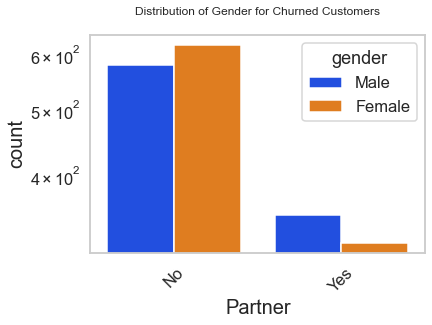

In [35]:
uniplot(df_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

* Females with no partners are likely to churn more than Males whereas Males with partner are likely to churn more than Females

<Figure size 576x432 with 0 Axes>

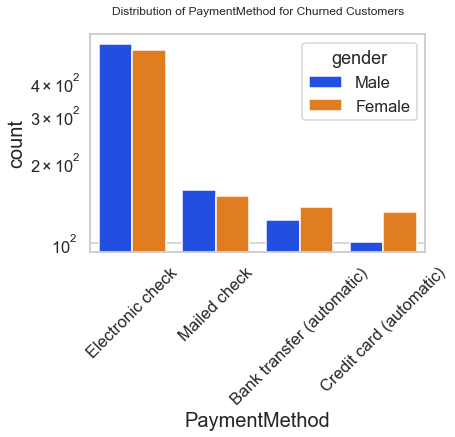

In [36]:
uniplot(df_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

* as inferred from previous analysis, poeple using Electronic check for payments are more likely to churn
* Also Females using Credit Cards or automatic Bank transfer are more likely to churn than Males

<Figure size 576x432 with 0 Axes>

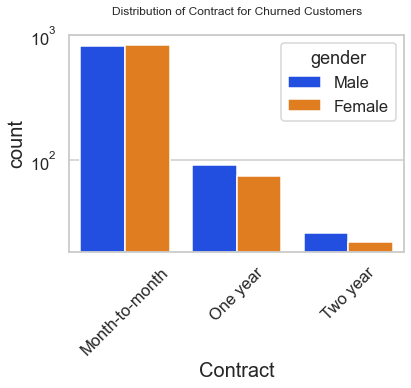

In [37]:
uniplot(df_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

* month-to-month customers are more likely to churn because of no contract terms, as they are free to go customers.

<Figure size 576x432 with 0 Axes>

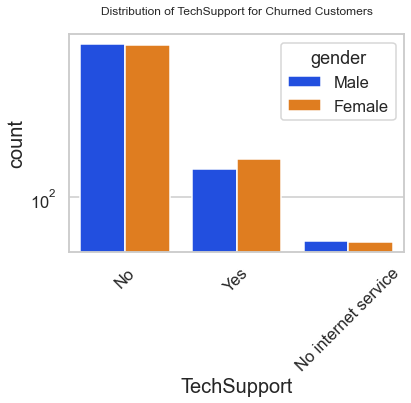

In [38]:
uniplot(df_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

* No Online security, No Tech Support category are high churners

<Figure size 576x432 with 0 Axes>

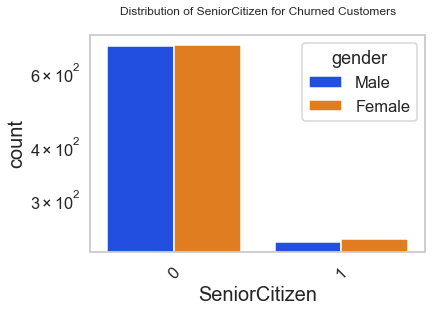

In [39]:
uniplot(df_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

<Figure size 576x432 with 0 Axes>

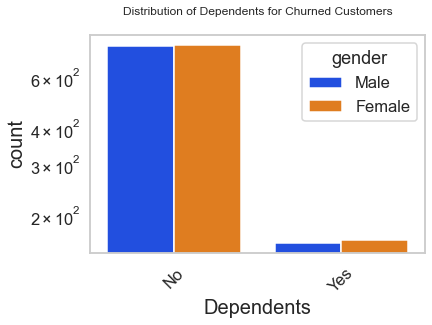

In [40]:
uniplot(df_target1,col='Dependents',title='Distribution of Dependents for Churned Customers',hue='gender')

* Non senior Citizens are high churners
* customers with no Dependents are more likey to churn

<Figure size 576x432 with 0 Axes>

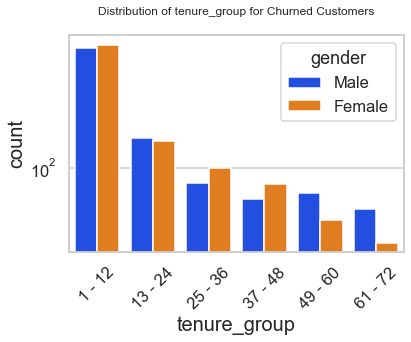

In [41]:
uniplot(df_target1,col='tenure_group',title='Distribution of tenure_group for Churned Customers',hue='gender')

* Females with tenure 25-48 months are more likely to churn while Males with tenure 49-72 months are more likely to churn

<Figure size 576x432 with 0 Axes>

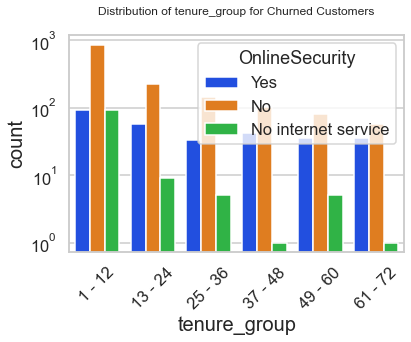

In [42]:
uniplot(df_target1,col='tenure_group',title='Distribution of tenure_group for Churned Customers',hue='OnlineSecurity')

# Model Building

In [43]:
data_dummies.columns

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'P

In [44]:
# columns that can be dropped on the theory of degree of freedom
drop_columns=['gender_Male','Partner_Yes','Dependents_Yes','PhoneService_Yes','MultipleLines_Yes','InternetService_No',
   'OnlineSecurity_Yes','OnlineBackup_Yes','DeviceProtection_Yes','TechSupport_Yes','StreamingTV_Yes','StreamingMovies_Yes',
            'Contract_Two year','PaperlessBilling_Yes','PaymentMethod_Mailed check','tenure_group_61 - 72']

new_data=data_dummies.drop(drop_columns,axis=1)

In [45]:
# separating feature and target varibale
X=new_data.drop('Churn',axis=1)
y=new_data['Churn']

In [46]:
# scaling the data using standard scalar

scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

since the data is imbalanced. we shall balance it using oversampling because we can't loose data

In [47]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN()
X, y = sm.fit_resample(X,y)

In [48]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=272)

### 1. Decision Tree Classifier

In [49]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
preddt=DTC.predict(X_test)
Accuracy_Score = accuracy_score(y_test, preddt)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:\n',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

#cross validation score
scores = cross_val_score(DTC, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\nAccuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 93.34155363748458
Confusion Matrix:
 [[670  54]
 [ 54 844]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       724
           1       0.94      0.94      0.94       898

    accuracy                           0.93      1622
   macro avg       0.93      0.93      0.93      1622
weighted avg       0.93      0.93      0.93      1622


Cross validation score : 93.90902081727063

Accuracy_Score - Cross Validation Score : -0.5674671797860498


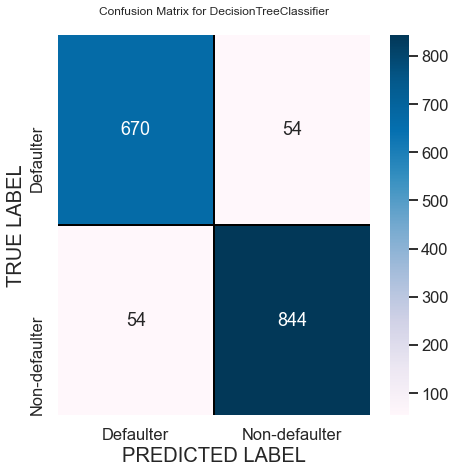

In [50]:
cm = confusion_matrix(y_test, preddt)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

### 2. Random Forest Classifier

In [51]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
predrf=RF.predict(X_test)
Accuracy_Score = accuracy_score(y_test, predrf)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:\n',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

#cross validation score
scores = cross_val_score(RF, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\nAccuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 96.6091245376079
Confusion Matrix:
 [[701  23]
 [ 32 866]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       724
           1       0.97      0.96      0.97       898

    accuracy                           0.97      1622
   macro avg       0.97      0.97      0.97      1622
weighted avg       0.97      0.97      0.97      1622


Cross validation score : 96.71549730146492

Accuracy_Score - Cross Validation Score : -0.10637276385702421


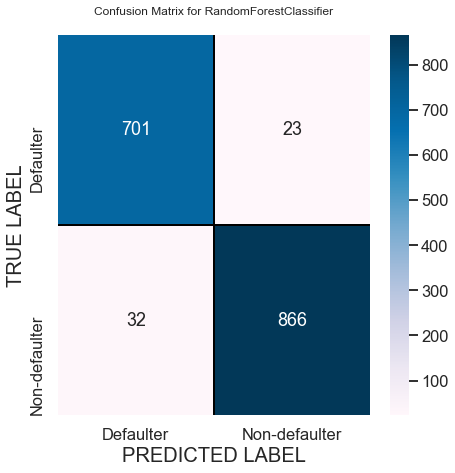

In [52]:
cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

### 3. Logistic Regression

In [53]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
predlr=LR.predict(X_test)
Accuracy_Score = accuracy_score(y_test, predlr)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:\n',confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

#cross validation score
scores = cross_val_score(LR, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\nAccuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 90.44389642416769
Confusion Matrix:
 [[645  79]
 [ 76 822]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       724
           1       0.91      0.92      0.91       898

    accuracy                           0.90      1622
   macro avg       0.90      0.90      0.90      1622
weighted avg       0.90      0.90      0.90      1622


Cross validation score : 90.96376252891287

Accuracy_Score - Cross Validation Score : -0.5198661047451765


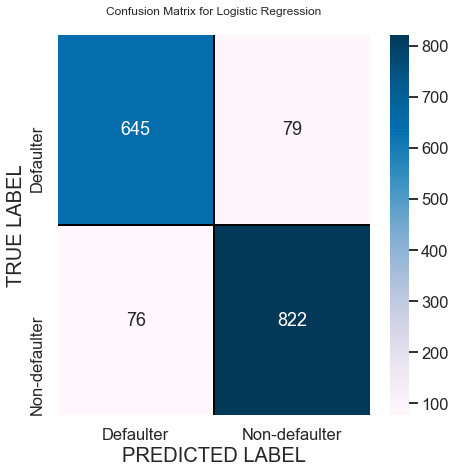

In [54]:
cm = confusion_matrix(y_test, predlr)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### 4. XGB Classifier

In [55]:
XGB=XGBClassifier(verbosity=0)
XGB.fit(X_train,y_train)
predxg=XGB.predict(X_test)
Accuracy_Score = accuracy_score(y_test, predxg)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:\n',confusion_matrix(y_test, predxg))
print(classification_report(y_test,predxg))

#cross validation score
scores = cross_val_score(XGB, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 96.23921085080148
Confusion Matrix:
 [[695  29]
 [ 32 866]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       724
           1       0.97      0.96      0.97       898

    accuracy                           0.96      1622
   macro avg       0.96      0.96      0.96      1622
weighted avg       0.96      0.96      0.96      1622


Cross validation score : 96.12952968388588
Accuracy_Score - Cross Validation Score : 0.10968116691560681


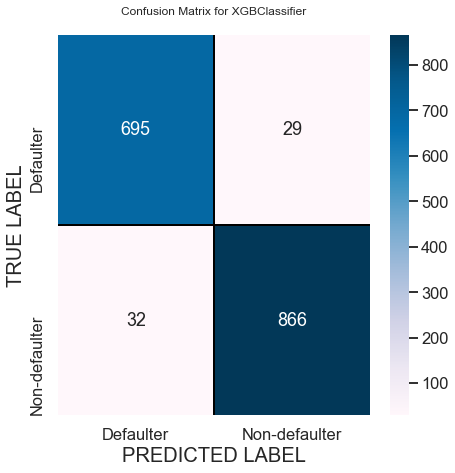

In [56]:
cm = confusion_matrix(y_test, predxg)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGBClassifier')
plt.show()

### 5. Support Vector Classier

In [57]:
svc=SVC()
svc.fit(X_train,y_train)
predab=svc.predict(X_test)
Accuracy_Score = accuracy_score(y_test, predab)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:\n',confusion_matrix(y_test, predab))
print(classification_report(y_test,predab))

#cross validation score
scores = cross_val_score(svc, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\nAccuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 94.63625154130703
Confusion Matrix:
 [[677  47]
 [ 40 858]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       724
           1       0.95      0.96      0.95       898

    accuracy                           0.95      1622
   macro avg       0.95      0.95      0.95      1622
weighted avg       0.95      0.95      0.95      1622


Cross validation score : 94.6337702390131

Accuracy_Score - Cross Validation Score : 0.0024813022939298435


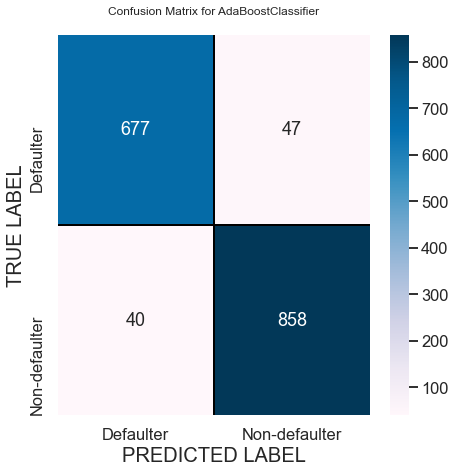

In [58]:
cm = confusion_matrix(y_test, predab)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoostClassifier')
plt.show()

#### ROC-AUC curve:

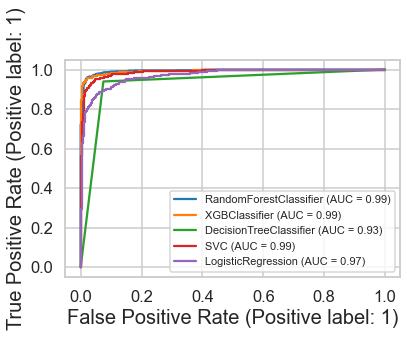

In [59]:
# Plotting ROC for all the models used here

disp = plot_roc_curve(RF,X_test,y_test)
plot_roc_curve(XGB, X_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, X_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, X_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

### Hyper Parameter tuning

As we can see Random forest classifier & XGB classifier have maximun accuracy and less cross validation score so lets try to hypertune both the model

In [62]:
# parameter for tuning Random forest classifier 

parameter = {'n_jobs': [-2,-1,1],
             'n_estimators':[80,100,120,150],
             'criterion':['gini','entropy']}

In [65]:
# parameter for tuning XGB classifier
parameter={
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

In [66]:
GCV=GridSearchCV(XGBClassifier(n_jobs=-1),parameter,cv=5)
GCV.fit(X_train,y_train)
GCV.best_params_

{'base_score': 0.2,
 'booster': 'gbtree',
 'gamma': 0,
 'learning_rate': 0.01,
 'n_estimators': 100,
 'reg_alpha': 0,
 'reg_lambda': 0.5}

In [70]:
# Hypertuned model on XGB classifier
Final_mod=XGBClassifier(booster='gbtree',base_score= 0.2, gamma= 0,learning_rate= 0.01, n_estimators=100,reg_alpha= 0)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print('Accuracy Score:',(accuracy_score(y_test,pred)*100))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score: 92.97163995067818
Confusion matrix:
 [[695  29]
 [ 85 813]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       724
           1       0.97      0.91      0.93       898

    accuracy                           0.93      1622
   macro avg       0.93      0.93      0.93      1622
weighted avg       0.93      0.93      0.93      1622



In [71]:
# Hypertuned model on Random forest classifier
Final_mod=RandomForestClassifier(bootstrap='True', n_jobs=-2,criterion='entropy', n_estimators=150)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print('Accuracy Score:',(accuracy_score(y_test,pred)*100))
print('Confusion matrix:\n',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score: 96.7940813810111
Confusion matrix:
 [[701  23]
 [ 29 869]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       724
           1       0.97      0.97      0.97       898

    accuracy                           0.97      1622
   macro avg       0.97      0.97      0.97      1622
weighted avg       0.97      0.97      0.97      1622



Since Random Forest classifer is giving better results so we will go with this model

### Model saving

In [74]:
# saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"Customer_Churn.pkl")

['Customer_Churn.pkl']

In [75]:
# loading the saved model
import joblib
model=joblib.load("Customer_Churn.pkl")

# Prediction
prediction = model.predict(X_test)
prediction

array([1, 1, 0, ..., 0, 0, 0])